In [1]:
colab = True

if colab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    !git clone https://github.com/deepmind/pycolab.git
    !git clone https://github.com/nicoladainese96/RelationalModule.git
    !pip install pycolab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Cloning into 'pycolab'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 218 (delta 2), reused 10 (delta 2), pack-reused 205
Receiving objects: 100% (218/218), 461.22 KiB | 1.48 MiB/s, done.
Resolving deltas: 100% (120/120), done.
Cloning into 'RelationalModule'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Com

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from RelationalModule import ActorCritic, ControlActorCritic
from RelationalModule import train_agent as train
from importlib import reload

In [3]:
reload(train)

<module 'RelationalModule.train_agent' from '/content/RelationalModule/train_agent.py'>

In [0]:
game_params = dict(grid_size=7,
                solution_length=[0],
                num_forward = [0], # number of distractors
                num_backward=[0], # just set to 0 for now
                branch_length=1 # length of forward distractors
               )

In [5]:
# Relational Agent

HPs = dict(action_space=4,
           lr=1e-4,
           gamma=0.99,
           TD=True,
           twin=True,
           tau=0.02,
           n_steps=50
           )
if colab:
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'

print('device: ', HPs['device'])  
agent = ActorCritic.BoxWorldA2C(**HPs)

device:  cuda


In [6]:
# Control Agent

HPs = dict(action_space=4,
           lr=1e-4,
           gamma=0.99,
           TD=True,
           twin=True,
           tau=0.02,
           n_steps=50
           )
if colab:
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'

print('device: ', HPs['device'])  
control_agent = ControlActorCritic.ControlA2C(**HPs)

device:  cuda


In [0]:
# Random Agent

class RandomAgent():
    def __init__(self, n_actions):
        self.n_actions = n_actions
    
    def get_action(self,state, *args, **kwargs):
        a = np.random.choice(self.n_actions)
        log_prob = np.log(1./self.n_actions) # just because it's the standard output of the other agent
        return a, log_prob
    
    def update(self, *args):
        return

rnd_agent = RandomAgent(4)

In [8]:
%%time
c_results = train.train_boxworld(control_agent, game_params, n_episodes = 5000, return_agent=True)
score, asymptotic_score, asymptotic_std, trained_agent, time_profile = c_results

/usr/local/lib/python3.6/dist-packages/pycolab/ascii_art.py:318: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  art = np.vstack(np.fromstring(line, dtype=np.uint8) for line in art)


Episode 100 - reward: 7.10
Episode 200 - reward: 9.00
Episode 300 - reward: 7.40
Episode 400 - reward: 7.60
Episode 500 - reward: 8.20
Episode 600 - reward: 7.90
Episode 700 - reward: 7.60
Episode 800 - reward: 7.20
Episode 900 - reward: 8.30
Episode 1000 - reward: 8.60
Episode 1100 - reward: 8.10
Episode 1200 - reward: 8.50
Episode 1300 - reward: 8.10
Episode 1400 - reward: 8.20
Episode 1500 - reward: 8.10
Episode 1600 - reward: 8.30
Episode 1700 - reward: 7.60
Episode 1800 - reward: 7.40
Episode 1900 - reward: 8.20
Episode 2000 - reward: 7.60
Episode 2100 - reward: 7.70
Episode 2200 - reward: 7.30
Episode 2300 - reward: 8.10
Episode 2400 - reward: 8.20
Episode 2500 - reward: 7.60
Episode 2600 - reward: 6.90
Episode 2700 - reward: 7.30
Episode 2800 - reward: 8.10
Episode 2900 - reward: 7.90
Episode 3000 - reward: 8.30
Episode 3100 - reward: 7.60
Episode 3200 - reward: 8.40
Episode 3300 - reward: 7.90
Episode 3400 - reward: 8.30
Episode 3500 - reward: 8.20
Episode 3600 - reward: 8.10
E

On my PC:

 Average time for playing an episode: 1.97428691 <br>
 Average time for updating the agent: 26.46678982

 On Colab notebook:

 Average time for playing an episode:  1.11658633 <br>
 Average time for updating the agent: 18.63836179


With GPU

Average time for playing an episode: 0.43020332 <br>
Average time for updating the agent: 0.64481306


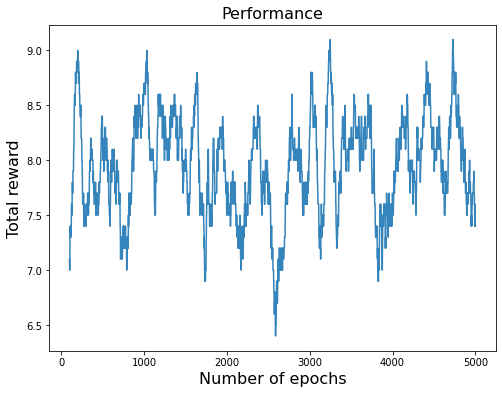

In [11]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(100, len(score))
average_score = np.array([np.mean(score[i:i+100]) for i in range(len(score)-100)])
plt.plot(n_epochs, average_score, alpha=0.9)
plt.title("Performance", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Total reward", fontsize=16)
plt.show()

In [0]:
save = False
if colab and save:
    %cd ~
    parent_dir = "/content/gdrive/My Drive/Colab Notebooks/"
    save_dir  = "RelationalTrained/"
    %cd "{parent_dir}"
    !mkdir "{save_dir}"
    torch.save(trained_agent, save_dir+"trained_agent1")
    np.save(save_dir+"performance1", score)
    np.save(save_dir+'HP1', HPs)
    np.save(save_dir+"game_params1", game_params)

In [0]:
reload = True
if reload:
    if colab:
        %cd ~
        parent_dir = "/content/gdrive/My Drive/Colab Notebooks/"
        save_dir  = "RelationalTrained/"
    else:
        pass
    reloaded_agent = torch.load(parent_dir+save_dir+"trained_agent1")
    reloaded_score = np.load(parent_dir+save_dir+"performance1.npy")
    reloaded_HPs = np.load(parent_dir+save_dir+"HP1.npy", allow_pickle=True).item()
    reloaded_game_params = np.load(parent_dir+save_dir+"game_params1.npy", allow_pickle=True).item()

/root
